In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('cleaned_C100.CSV',low_memory=False)

In [3]:
 import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import heatmap

In [4]:
# Printing all the columns of dataframe

column_names = df.columns.tolist()
print(column_names)

['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'MAIN', 'NUMBRANCH', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SAT_AVG', 'SAT_AVG_ALL', 'DISTANCEONLY', 'UGDS', 'PPTUG_EF', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PCTPELL', 'COST4', 'NPT4', 'TUITIONFEE1_IN', 'TUITIONFEE1_OUT', 'COMP_ORIG_YR4_RT', 'C100_4_POOLED_SUPP']


In [5]:
cols = ['ADM_RATE_ALL','SAT_AVG_ALL','UGDS','PPTUG_EF','TUITFTE','INEXPFTE','AVGFACSAL','PCTPELL','COST4','NPT4','TUITIONFEE1_IN','TUITIONFEE1_OUT','C100_4_POOLED_SUPP']


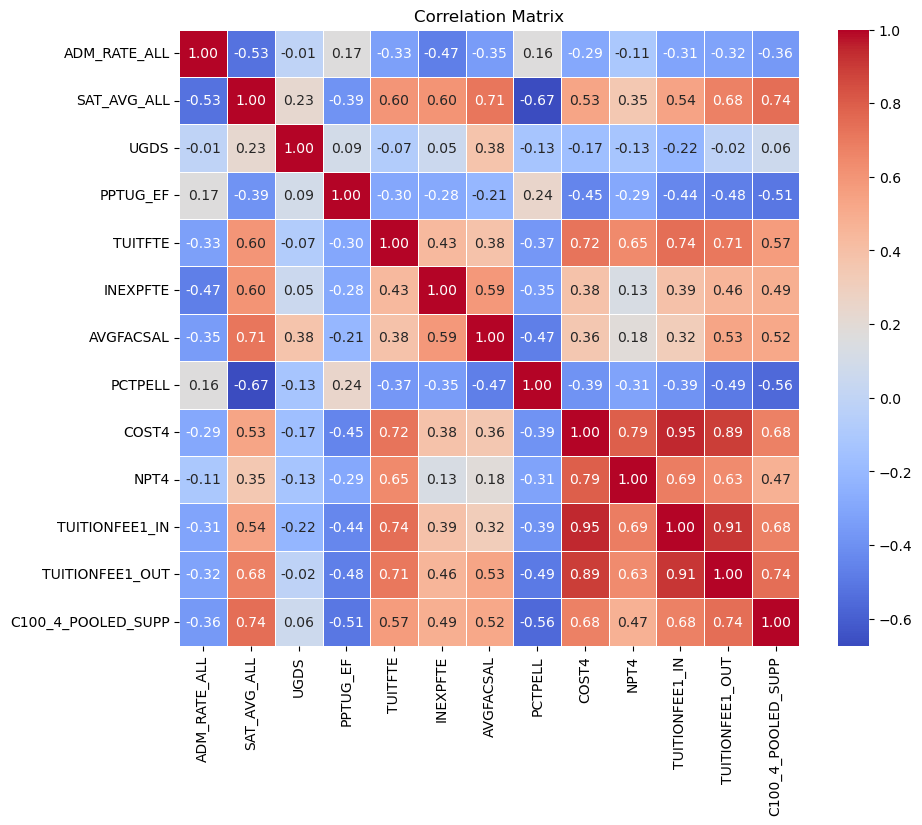

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix between numerical features
corr_matrix = df[cols].corr()

# Increase the size of the heatmap. You can adjust the size by changing the values of figsize.
plt.figure(figsize=(10, 8))  # Adjust these numbers as needed to get the desired size

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # fmt=".2f" makes the annotations display with 2 decimal places; linewidths can add a small gap between cells
plt.title('Correlation Matrix')
plt.show()


In [7]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,MAIN,NUMBRANCH,...,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,COST4,NPT4,TUITIONFEE1_IN,TUITIONFEE1_OUT,COMP_ORIG_YR4_RT,C100_4_POOLED_SUPP
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,1,1,...,9243.0,7699.0,8779.0,0.6853,21924,13057,10024,18634,0.22236671,0.1090
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,1,1,...,11678.0,14264.0,11590.0,0.3253,26248,16585,8568,20400,0.454072146,0.4008
2,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,1,1,...,8246.0,8156.0,9820.0,0.2377,24869,17250,11488,23884,0.369397218,0.3356
3,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,1,1,...,8535.0,9459.0,7701.0,0.7205,21938,13593,11068,19396,0.246203038,0.1245
4,100751,105100.0,1051.0,The University of Alabama,Tuscaloosa,AL,35487-0100,Southern Association of Colleges and Schools C...,1,1,...,13731.0,8912.0,10509.0,0.1712,31050,21534,11620,31090,0.57664659,0.5248


In [8]:
column_names = df.columns.tolist()
print(column_names)


['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'MAIN', 'NUMBRANCH', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SAT_AVG', 'SAT_AVG_ALL', 'DISTANCEONLY', 'UGDS', 'PPTUG_EF', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PCTPELL', 'COST4', 'NPT4', 'TUITIONFEE1_IN', 'TUITIONFEE1_OUT', 'COMP_ORIG_YR4_RT', 'C100_4_POOLED_SUPP']


In [9]:
# Dropping columns which are not related to graduation rate

df.drop(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'MAIN', 'NUMBRANCH', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE','COMP_ORIG_YR4_RT','RELAFFIL'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

In [11]:
print(df.columns)

Index(['CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL',
       'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'ADM_RATE',
       'ADM_RATE_ALL', 'SAT_AVG', 'SAT_AVG_ALL', 'DISTANCEONLY', 'UGDS',
       'PPTUG_EF', 'CURROPER', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PCTPELL',
       'COST4', 'NPT4', 'TUITIONFEE1_IN', 'TUITIONFEE1_OUT',
       'C100_4_POOLED_SUPP'],
      dtype='object')


In [12]:
df.head()

,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,...,CURROPER,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,COST4,NPT4,TUITIONFEE1_IN,TUITIONFEE1_OUT,C100_4_POOLED_SUPP
0,18,10,14,1,0,0,0,0,0,0,...,1,9243.0,7699.0,8779.0,0.6853,21924,13057,10024,18634,0.1090
1,15,9,15,0,0,0,0,0,0,0,...,1,11678.0,14264.0,11590.0,0.3253,26248,16585,8568,20400,0.4008
2,15,15,13,0,0,0,0,0,0,0,...,1,8246.0,8156.0,9820.0,0.2377,24869,17250,11488,23884,0.3356
3,17,10,14,1,0,0,0,0,0,0,...,1,8535.0,9459.0,7701.0,0.7205,21938,13593,11068,19396,0.1245
4,15,12,16,0,0,0,0,0,0,0,...,1,13731.0,8912.0,10509.0,0.1712,31050,21534,11620,31090,0.5248


In [13]:
# Checking columns with missing values

missing_values = df.isnull().sum()
print(missing_values)


CCBASIC                 0
CCUGPROF                0
CCSIZSET                0
HBCU                    0
PBI                     0
ANNHI                   0
TRIBAL                  0
AANAPII                 0
HSI                     0
NANTI                   0
MENONLY                 0
WOMENONLY               0
ADM_RATE              259
ADM_RATE_ALL          234
SAT_AVG               796
SAT_AVG_ALL           772
DISTANCEONLY            0
UGDS                    1
PPTUG_EF                2
CURROPER                0
TUITFTE                 1
INEXPFTE                1
AVGFACSAL              16
PCTPELL                 6
COST4                   0
NPT4                    0
TUITIONFEE1_IN          0
TUITIONFEE1_OUT         0
C100_4_POOLED_SUPP      0
dtype: int64


In [14]:
# Missing categorical and continuous columns
missing_val_col= ['ADM_RATE','ADM_RATE_ALL','SAT_AVG','SAT_AVG_ALL','UGDS','PPTUG_EF','TUITFTE','INEXPFTE','AVGFACSAL','PCTPELL']

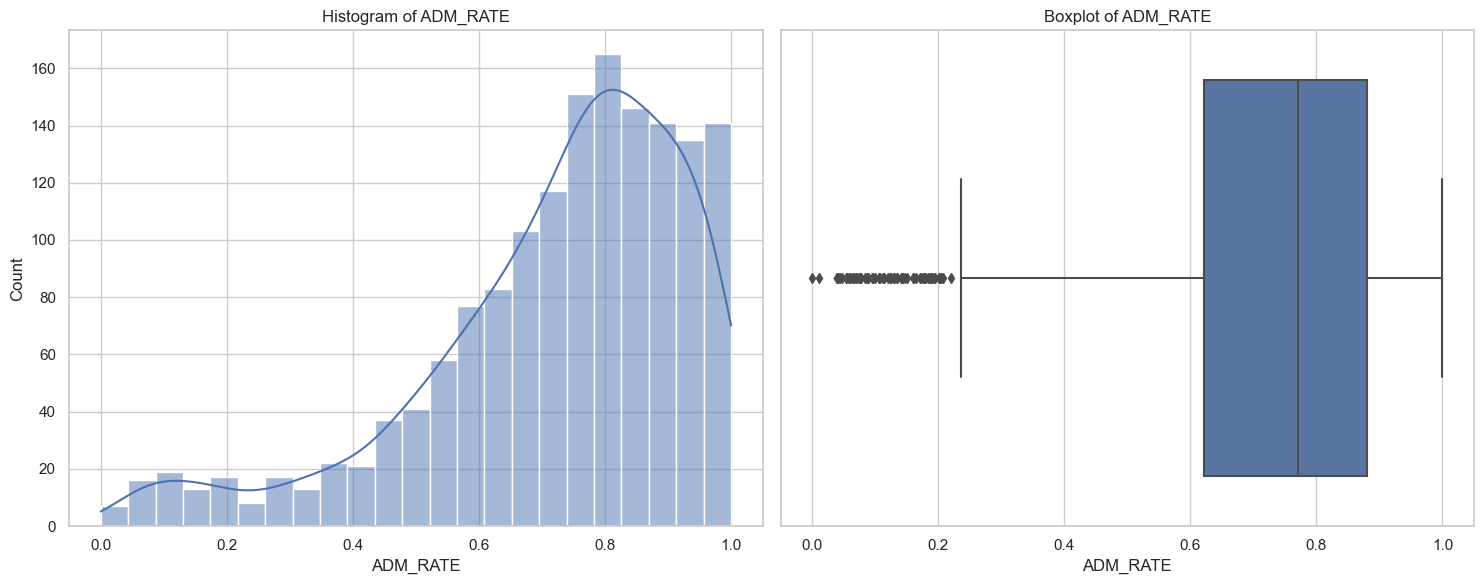

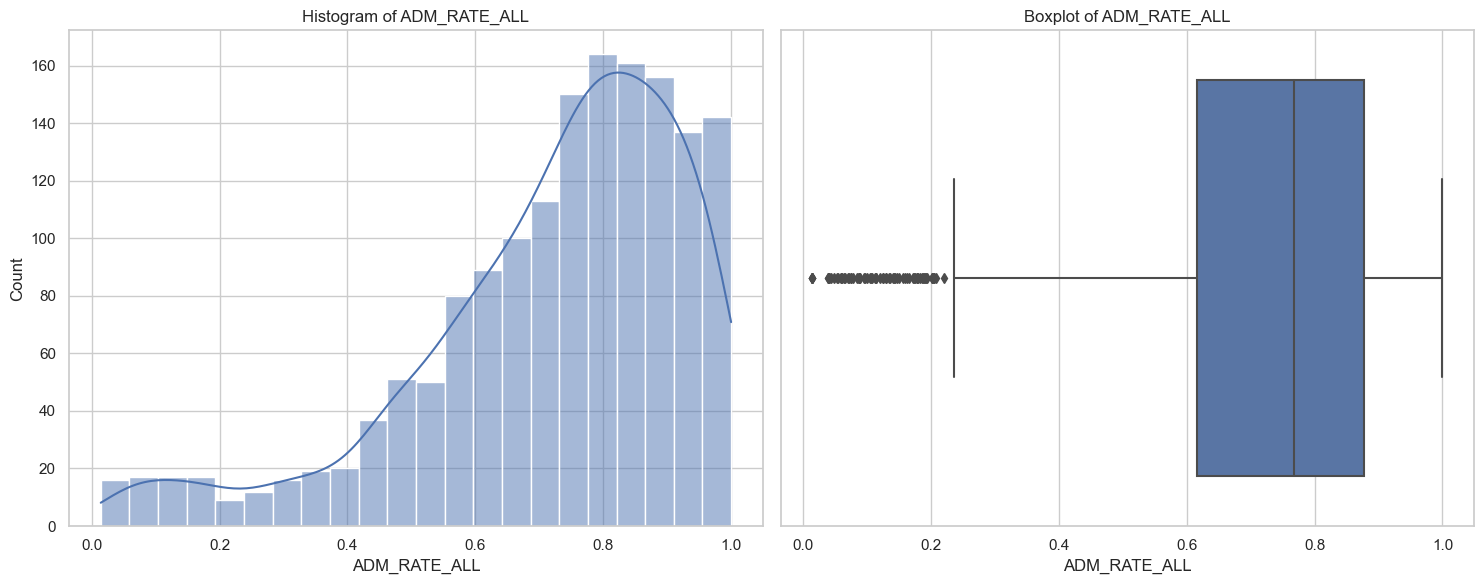

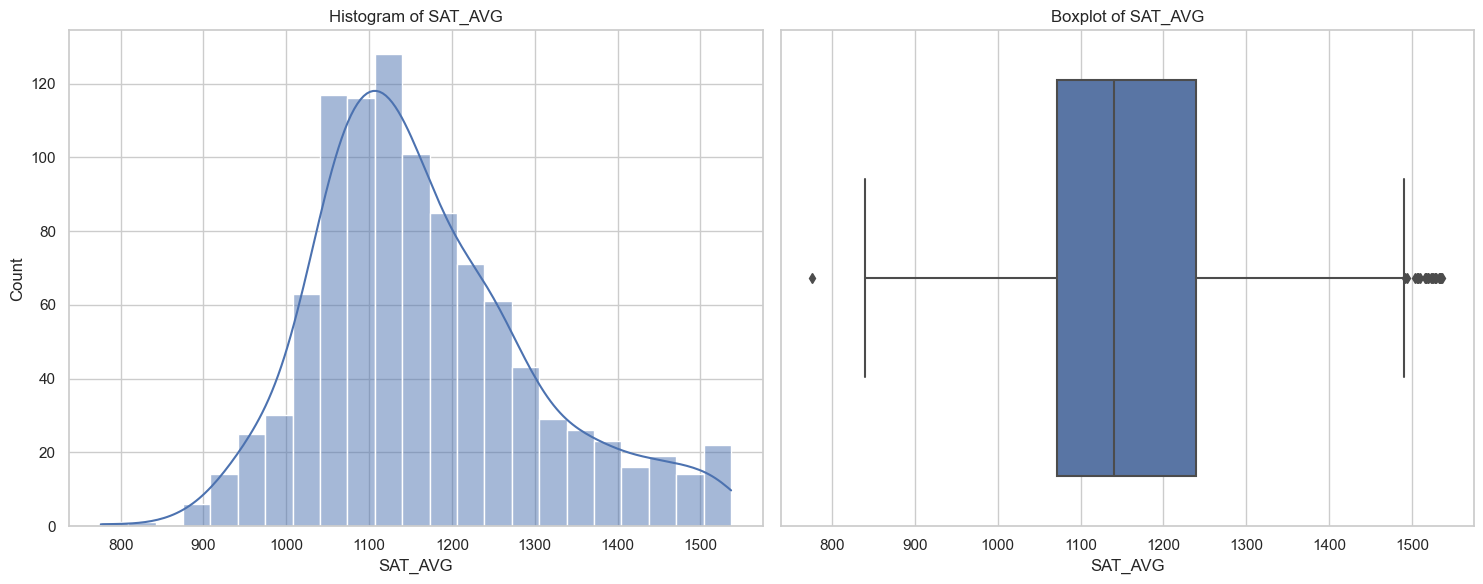

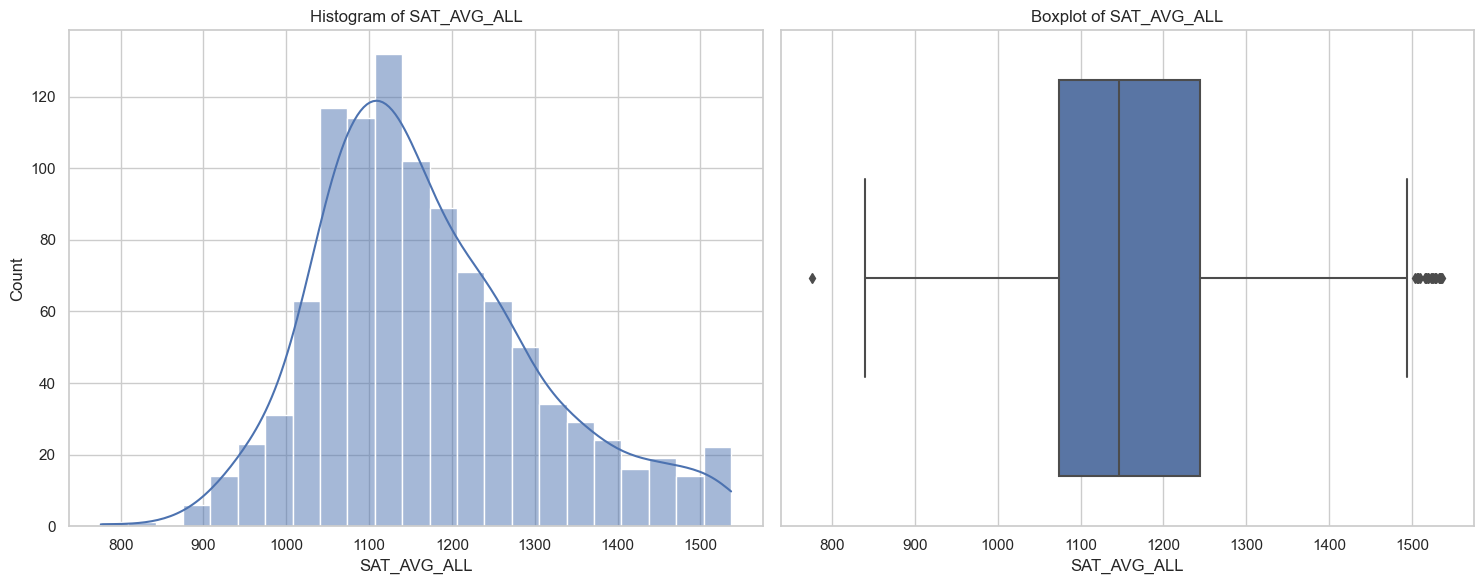

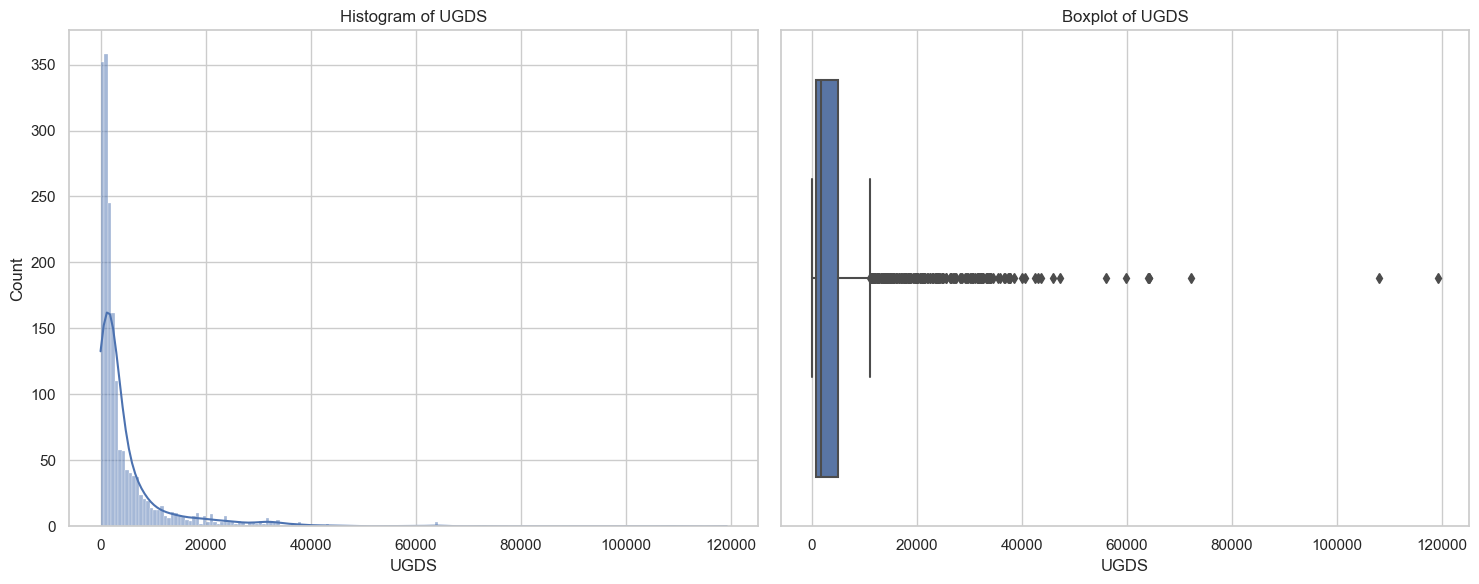

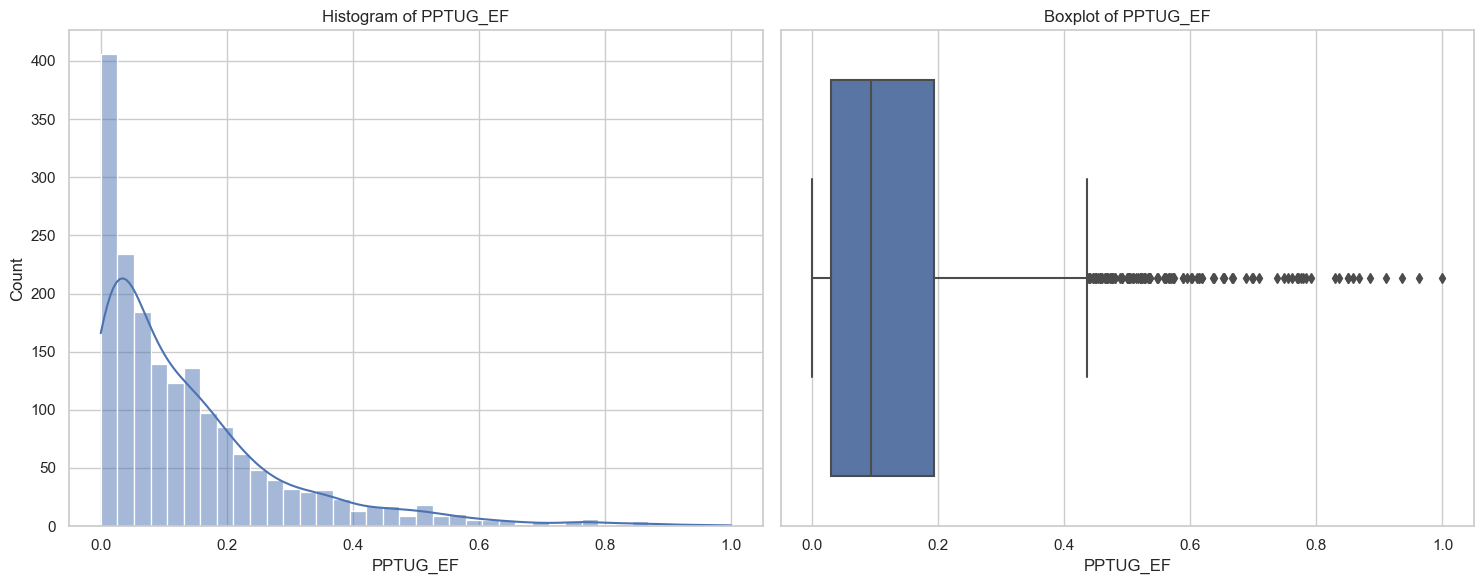

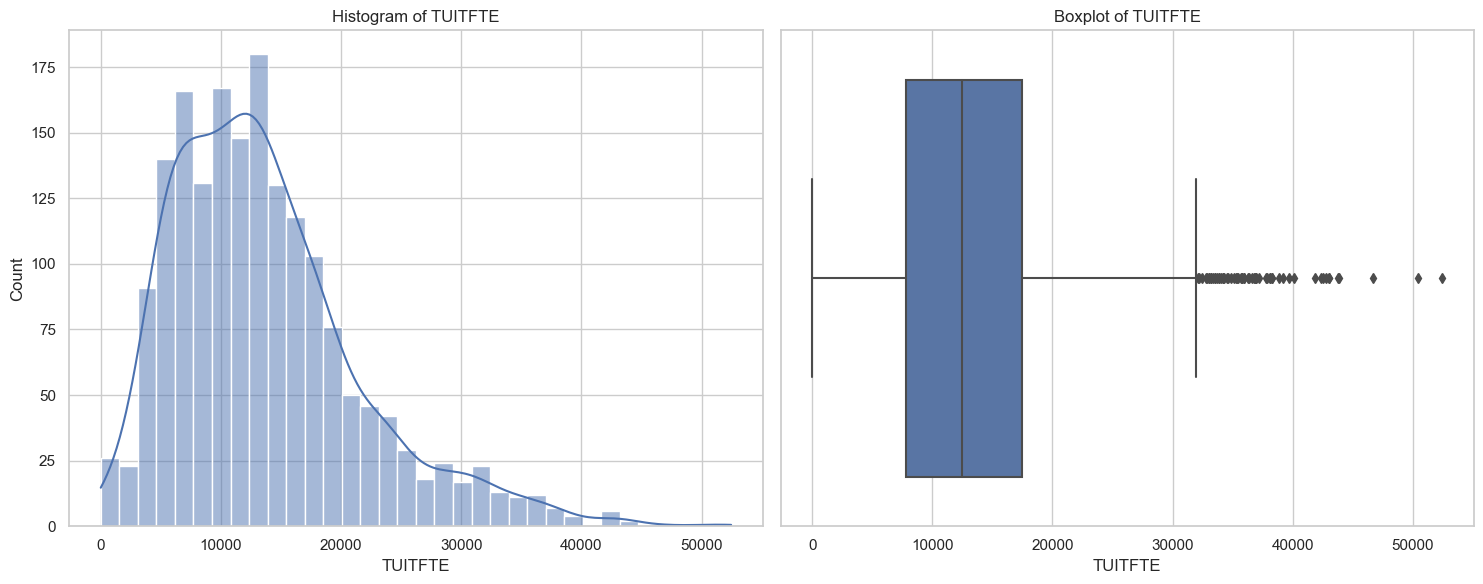

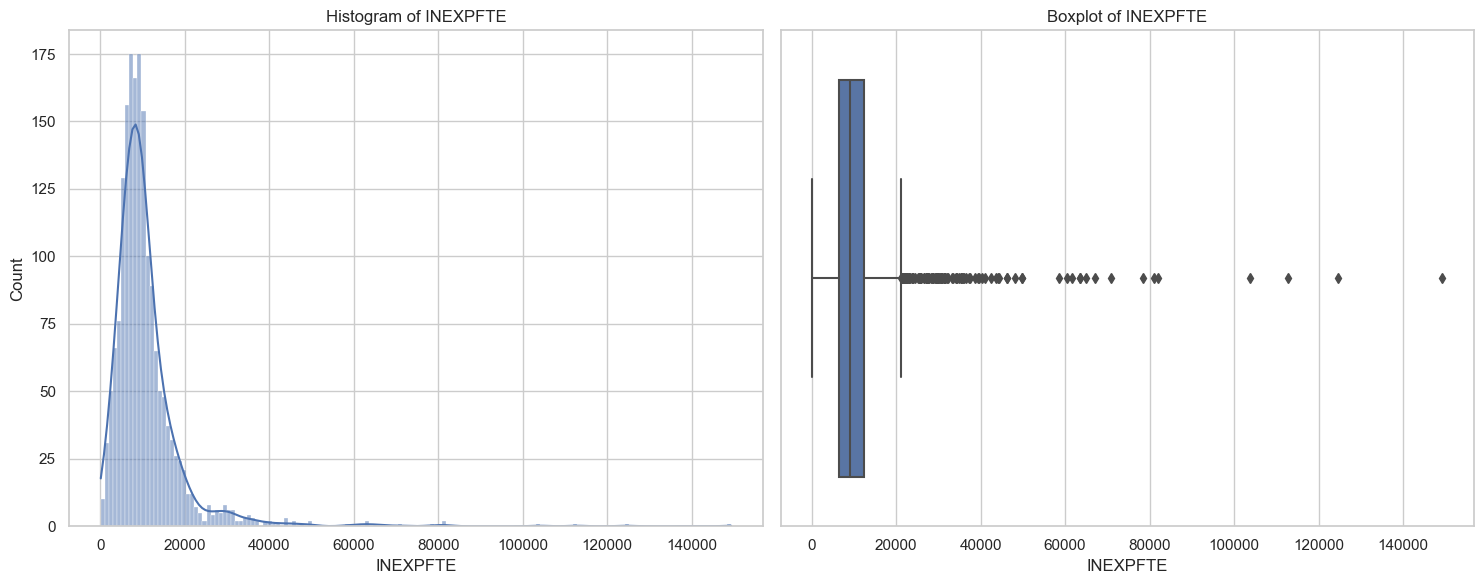

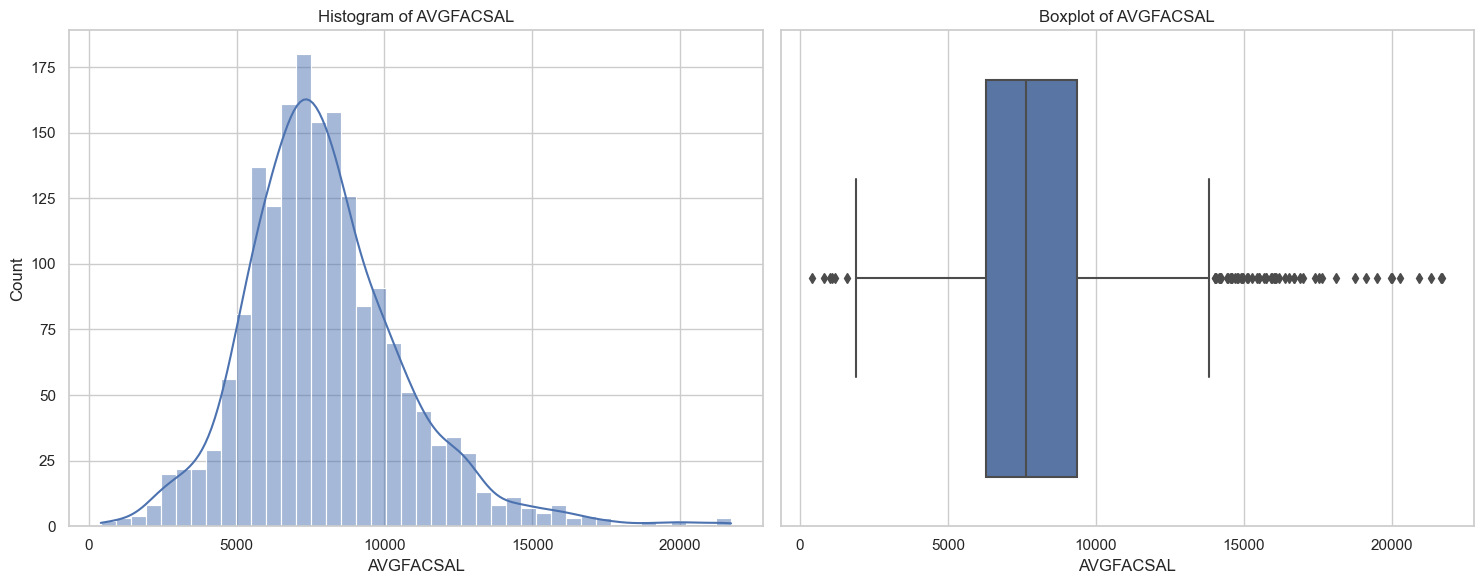

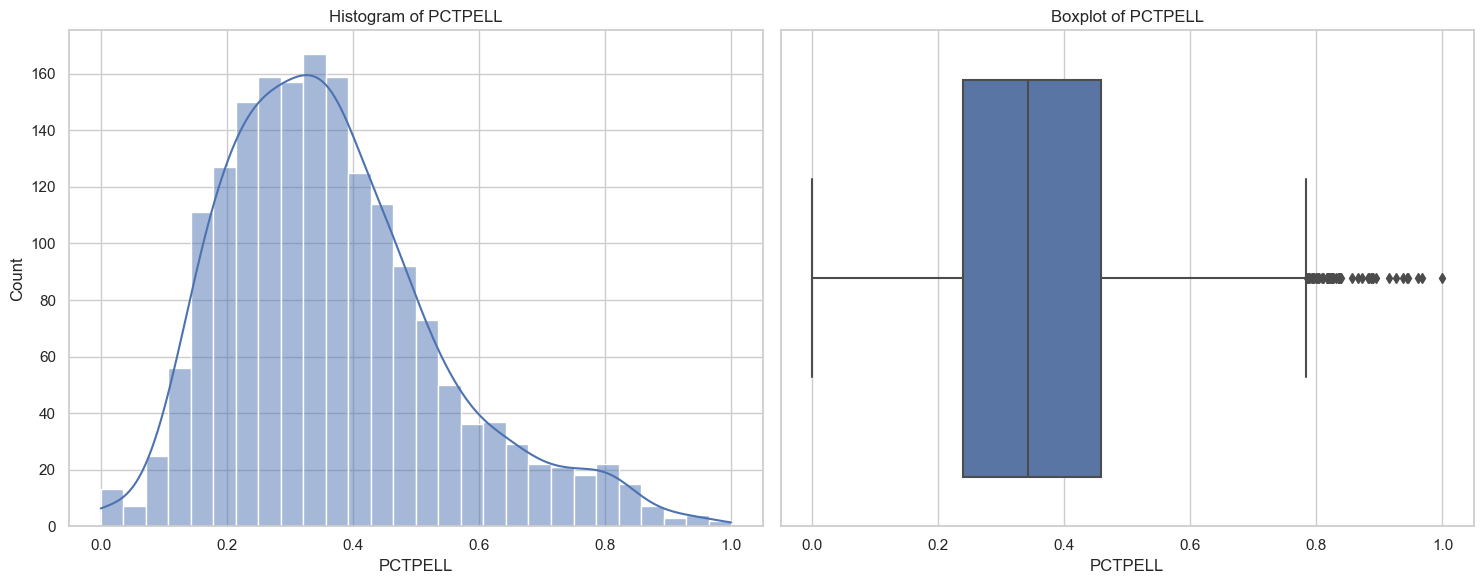

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_val_col = ['ADM_RATE','ADM_RATE_ALL','SAT_AVG','SAT_AVG_ALL','UGDS','PPTUG_EF','TUITFTE','INEXPFTE','AVGFACSAL','PCTPELL']

# Set the style of the visualization
sns.set(style="whitegrid")

# Draw a bar plot of 'value' frequency for each missing_val_col
for col in missing_val_col:
    plt.figure(figsize=(15, 6))
    
    # Draw histogram
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot = histogram
    sns.histplot(df[col], kde=True) # kde=True will also plot a Gaussian Kernel Density Estimate
    plt.title(f'Histogram of {col}')
    
    # Draw boxplot
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot = boxplot
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()  # Ensure the plots don't overlap
    plt.show()


After checking the histogram and box plots. considering to use mean if distribution is normal and median if distribution has skewness. I did replaced missing values as above. ADM_RATE column missing values replaced with median, SAT_AVG column missing values replaced with mean.Columns like UGDS,PPTUG_EF,TUITFTE,INEXPFTE missing values are replaced with median and AVGFACSAL, PCTPEL columns are replaced with mean

In [16]:
# Replacing missing values with mean and median 

# Columns to replace NaN with median values
cols_with_median = ['UGDS', 'PPTUG_EF', 'TUITFTE', 'INEXPFTE', 'ADM_RATE', 'ADM_RATE_ALL']
for col in cols_with_median:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Columns to replace NaN with mean values
cols_with_mean = ['SAT_AVG', 'SAT_AVG_ALL', 'AVGFACSAL', 'PCTPELL']
for col in cols_with_mean:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)


In [17]:
# Checking columns with missing values

missing_values = df.isnull().sum()
print(missing_values)


CCBASIC               0
CCUGPROF              0
CCSIZSET              0
HBCU                  0
PBI                   0
ANNHI                 0
TRIBAL                0
AANAPII               0
HSI                   0
NANTI                 0
MENONLY               0
WOMENONLY             0
ADM_RATE              0
ADM_RATE_ALL          0
SAT_AVG               0
SAT_AVG_ALL           0
DISTANCEONLY          0
UGDS                  0
PPTUG_EF              0
CURROPER              0
TUITFTE               0
INEXPFTE              0
AVGFACSAL             0
PCTPELL               0
COST4                 0
NPT4                  0
TUITIONFEE1_IN        0
TUITIONFEE1_OUT       0
C100_4_POOLED_SUPP    0
dtype: int64


We can see all the columns with no missing values.I want to encode categorical variables to get the find the feature importance score for all columns in the dataframe.

In [18]:
# Encode categorical features
label_encoder = LabelEncoder()
cat_colmns = ['CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY']


# For loop to encode categorical columns 
for col in cat_colmns:
    df[col] = label_encoder.fit_transform(df[col])
    

# Create feature matrix and target vector
X = df.drop(['C100_4_POOLED_SUPP'], axis=1)
y = df['C100_4_POOLED_SUPP']


# Train RandomForestRegressor and get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=12)
rf.fit(X, y)
feature_importances = rf.feature_importances_



# Print feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], feature_importances[indices[f]]))

1. TUITIONFEE1_OUT (0.496504)
2. PCTPELL (0.098777)
3. SAT_AVG (0.056519)
4. PPTUG_EF (0.053097)
5. COST4 (0.040671)
6. INEXPFTE (0.028930)
7. TUITIONFEE1_IN (0.027125)
8. CCUGPROF (0.025886)
9. AVGFACSAL (0.025264)
10. TUITFTE (0.022022)
11. ADM_RATE (0.021631)
12. UGDS (0.020896)
13. ADM_RATE_ALL (0.020649)
14. NPT4 (0.019606)
15. CCBASIC (0.011850)
16. CCSIZSET (0.011391)
17. SAT_AVG_ALL (0.010441)
18. HBCU (0.002400)
19. HSI (0.001689)
20. CURROPER (0.001413)
21. MENONLY (0.001238)
22. WOMENONLY (0.000596)
23. DISTANCEONLY (0.000485)
24. AANAPII (0.000434)
25. PBI (0.000310)
26. NANTI (0.000119)
27. ANNHI (0.000039)
28. TRIBAL (0.000016)


After observing the feature importance score, I observed TUTIONFEE1_OUT, PCTPELL and SAT_AVG showed larger scores which shows there are more important.

In [19]:
cols = ['ADM_RATE_ALL','SAT_AVG_ALL','UGDS','PPTUG_EF','TUITFTE','INEXPFTE','AVGFACSAL','PCTPELL','COST4','NPT4','TUITIONFEE1_IN','TUITIONFEE1_OUT','C100_4_POOLED_SUPP']


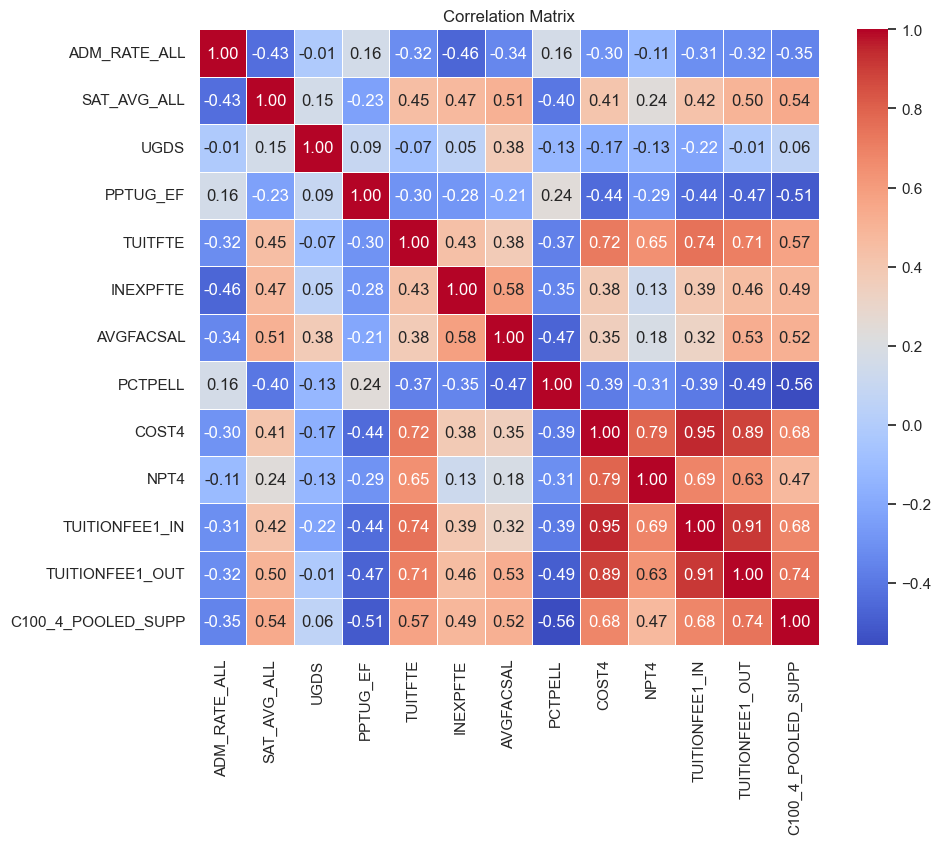

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix between numerical features
corr_matrix = df[cols].corr()

# Increase the size of the heatmap. You can adjust the size by changing the values of figsize.
plt.figure(figsize=(10, 8))  # Adjust these numbers as needed to get the desired size

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # fmt=".2f" makes the annotations display with 2 decimal places; linewidths can add a small gap between cells
plt.title('Correlation Matrix')
plt.show()

After visualizing the relationship between the target variable (C100_4_POOLED_SUPP) and other numerical features in the given dataset, we can observe the following:

**TUTIONFEE1_OUT**: There is a strong positive correlation between tutionfee for out of state students and graduation rate. As tutionfee increases, graduation rate also tend to increase. 

**COST4**: The Cost for 4 years also shows positive correlation with the graduation rate.

**PCTPELL**: which is percentage of students received pell grant also inversely proportional to the target variable graduation rate.

After taking into account of the covariance matrix and the feature important score **TUITIONFEE1_OUT, PCTPELL and COST4, SAT_AVG** are the important feature for the graduation completion rate.